# <center>DataLab Cup 3: Reverse Image Caption - Report</center>

<center>111062201 林威盛<br/>111062209 毛柏毅<br/>111062315 張以寧</center>


## Dataset

### Loading Data

The provided dataset consists of 7370 images, each of which is associated with multiple captions. To maximize the utility of the dataset, we decided to use all the captions for training, resulting in a total of 70464 caption-image pairs (or 1101 batches of 64 pairs).

### Data Augmentation

Random left-right flipping and random brightness adjustment were applied to the images during training, with a probability of 0.25 for each augmentation. This was done to increase the diversity of the training data and improve the model's generalization ability.

To improve the training efficiency, we normalized the pixel values of the images to the range $[-1, 1]$. This ensures that the model's weights are updated more evenly during training, which can help prevent the vanishing gradient problem.

### Caption Encoding

The captions were provided as arrays of token IDs, with each token corresponding to a word in the given vocabulary. However, we want to maximize the utility of the captions semantic information, so we decided to use a pre-trained `SentenceTransformer` model to encode the captions into dense vectors.

We used `cruzlorite/all-mpnet-base-v2-unfair-tos-rationale` as the pre-trained model, which is a fine-tuned version of `sentence-transformers/all-mpnet-base-v2`. It maps sentences & paragraphs to a **768-dimensional dense vector space** and can be used for semantic textual similarity, semantic search, paraphrase mining, text classification, clustering, and more.

To accelerate the training process, we pre-processed the captions and saved the encoded vectors to disk. This way, we can load the encoded vectors directly during training, which significantly reduces the training time.

## GAN Model

We mainly experimented with two types of GAN models: **WGAN-GP** and **RAT-GAN**. RAT-GAN is claimed to be more effective in generating high-quality images, but our implementation of RAT-GAN did not perform as well as WGAN-GP in practice.

### WGAN-GP
- **Architecture:** Our model is primarily inspired by WGAN-GP, which improved stability using the Wasserstein distance and a gradient penalty, incorporating elements of the DCGAN architecture. Since the original structure did not support text inputs, we concatenated the processed embedding (via a dense layer) with random noise in both the generator and discriminator. To reduce computational cost, we implemented only three transposed convolution layers and one output layer in the generator. Additionally, the discriminator utilized two convolutional layers, with inputs comprising the concatenated embedding and image.

- **Training and Loss Function:** We replaced the original weight clipping from DCGAN with a gradient penalty in the discriminator's loss function. During training, we tested several settings and ultimately chose n_critic = 3, representing the ratio of discriminator to generator training steps.

- **Other Parameters:** Since initialization played an important role in our previous competition, we experimented with various standard deviations, including 0.01, 0.02, and 0.05. The 0.05 configuration achieved the best performance in the public ranking but experienced a significant drop in the private ranking. Additionally, we attempted to increase the hidden layer dimensions to improve our score but encountered model failure.   

### RAT-GAN

## Conclusion

### Pitfalls

During training, we encountered several issues that hindered the model's performance:

- **Mode Collapse**: We once experienced with a small model size, and the generator ended up generating a noisy light blue image for all captions and noises. Even though typical mode collapse did not happen, we believe that such a phenomenon is a form of mode collapse, as the generator failed to generate diverse images for different captions.
- **Checkpointing**: Although we saved the model checkpoints with Tensorflow's API, we found several issues with the saved checkpoints. Sometimes, the model failed to load the saved checkpoints, and we had to retrain the model from scratch. The custom weights in RAT-GAN also caused issues with checkpointing, as some versions of Tensorflow requires the custom weights to be explicitly named. These issues significantly bothered our training process, and shows the long-existing problem with Tensorflow's checkpointing system.

### Inference Example & Results

We used a combination of 5 random captions from the test set and 5 random noise vectors to generate images. The generated images are shown below.

While the caption is expected to have visible effect on the shape and texture (e.g. "with only one large petal"), our results only show the **color effect of the caption**. Instead, the noise vector seems to have a more significant impact on the shape and texture of the generated images. This suggests that the text encoder may not be effectively capturing the desired semantic information from the captions.

Also, noise 1 and noise 5 generate images with visible loss of quality compared to other noise vectors. This shows the importance of the noise vector in generating high-quality images.

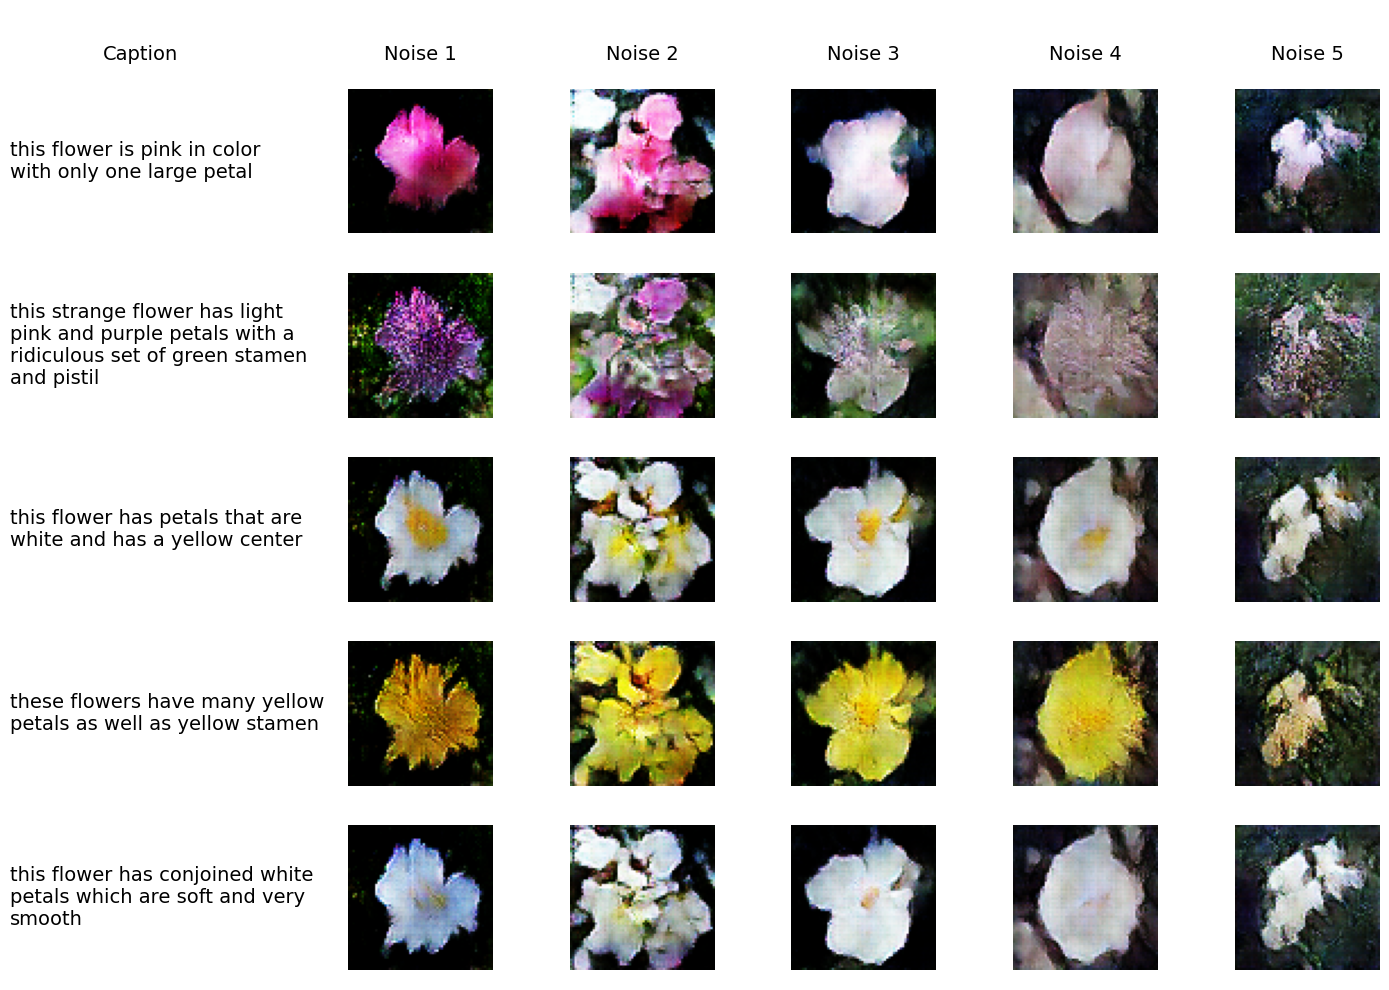

In [1]:
from IPython.display import Image

Image('samples/demo/generated_images.png')